# Advanced Regression

### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

### Business goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first import required packages and start with reading the dataset 

In [1]:
# Import Required libraries

import numpy as np
import pandas as pd

import calendar

pd.options.display.max_rows = 1000
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew 

import warnings
warnings.filterwarnings("ignore") 

## Loading Data

In [2]:
## Load housing data and view 1st 5 rows from the dataframe
houseDF = pd.read_csv('train.csv')
houseDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## Check the shape of the dataframe
houseDF.shape

(1460, 81)

In [4]:
## Check descriptive information of the dataframe
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
## Generate descriptive statistics of the dataframe applying Transpose to get clear view in rows for all the features
houseDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Data Cleaning and Preparation

In [6]:
##Check missing values and printing total missing count as well as in percentage of total values 
mis_val = houseDF.isnull().sum()
mis_val_percentage = 100*mis_val/len(houseDF)
missing_val = pd.concat([mis_val,mis_val_percentage],axis =1)
missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_val = missing_val.sort_values('Missing Values',ascending = False)
missing_val[(missing_val['Missing Values'] > 0)]

,Missing Values,% of Total Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [7]:
##Printing all unique values from columns where we have missing data
nullColumns = ['Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical']

for colName in nullColumns:
    print(colName)
    print(houseDF[colName].unique())
    print("===========================")

Alley
[nan 'Grvl' 'Pave']
PoolQC
[nan 'Ex' 'Fa' 'Gd']
Fence
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1

### Imputing null values for columns

In [8]:
## Imputing values in all categorical data type columns
houseDF['Alley'] = houseDF['Alley'].fillna('No_Alley')
houseDF['PoolQC'] = houseDF['PoolQC'].fillna('No_Pool')
houseDF['Fence'] = houseDF['Fence'].fillna('No_Fence')
houseDF['FireplaceQu'] = houseDF['FireplaceQu'].fillna('No_FP')
houseDF['MiscFeature'] = houseDF['MiscFeature'].fillna('No_Feature')
houseDF['MasVnrType'] = houseDF['MasVnrType'].fillna('None')
houseDF['BsmtQual'] = houseDF['BsmtQual'].fillna('No_Basement')
houseDF['BsmtCond'] = houseDF['BsmtCond'].fillna('No_Basement')
houseDF['BsmtExposure'] = houseDF['BsmtExposure'].fillna('No_Basement')
houseDF['BsmtFinType1'] = houseDF['BsmtFinType1'].fillna('No_Basement')
houseDF['BsmtFinType2'] = houseDF['BsmtFinType2'].fillna('No_Basement')
houseDF['GarageType'] = houseDF['GarageType'].fillna('No_Garage')
houseDF['GarageFinish'] = houseDF['GarageFinish'].fillna('No_Garage')
houseDF['GarageQual'] = houseDF['GarageQual'].fillna('No_Garage')
houseDF['GarageCond'] = houseDF['GarageCond'].fillna('No_Garage')

In [9]:
## Imputing values in all numeric data type columns
houseDF['LotFrontage'] = houseDF['LotFrontage'].fillna(houseDF['LotFrontage'].median()) 
houseDF['MasVnrArea'] = houseDF['MasVnrArea'].fillna(houseDF['MasVnrArea'].median()) 
houseDF['GarageYrBlt'] = houseDF['GarageYrBlt'].fillna(0).apply(lambda x: int(x))
houseDF['Electrical'] = houseDF['Electrical'].fillna(houseDF['Electrical'].mode()[0])

In [10]:
## Checking the missing value again in dataframe
mis_val = houseDF.isnull().sum()
mis_val[mis_val > 0]

Series([], dtype: int64)

In [11]:
# Checking for duplicate data
dup_data = houseDF.duplicated()
print('Number of duplicate rows = %d' % (dup_data.sum()))
houseDF[dup_data]

Number of duplicate rows = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Derived Metrices

In [12]:
houseDF['HouseBuiltAge'] = houseDF.YrSold - houseDF.YearBuilt
houseDF['HouseRemodelAge'] = houseDF.YrSold - houseDF.YearRemodAdd
houseDF['GarageAge'] = houseDF.YrSold - houseDF.GarageYrBlt

In [13]:
houseDF = houseDF.drop('YearBuilt', axis = 1)
houseDF = houseDF.drop('YearRemodAdd', axis = 1)
houseDF = houseDF.drop('GarageYrBlt', axis = 1)

## Exploratory Data Analysis

### Numerical Data

In [14]:
## Creating temporary dataframe to prepare numeric data
numColumns = houseDF.select_dtypes(include=np.number).columns.tolist()
numColumns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HouseBuiltAge',
 'HouseRemodelAge',
 'GarageAge']

In [15]:
## Print all unique values for numeric columns
for i in range(len(numColumns)):
    print("The uniques Value Count for {0} : {1}".format(numColumns[i], houseDF[numColumns[i]].nunique()))

The uniques Value Count for Id : 1460
The uniques Value Count for MSSubClass : 15
The uniques Value Count for LotFrontage : 110
The uniques Value Count for LotArea : 1073
The uniques Value Count for OverallQual : 10
The uniques Value Count for OverallCond : 9
The uniques Value Count for MasVnrArea : 327
The uniques Value Count for BsmtFinSF1 : 637
The uniques Value Count for BsmtFinSF2 : 144
The uniques Value Count for BsmtUnfSF : 780
The uniques Value Count for TotalBsmtSF : 721
The uniques Value Count for 1stFlrSF : 753
The uniques Value Count for 2ndFlrSF : 417
The uniques Value Count for LowQualFinSF : 24
The uniques Value Count for GrLivArea : 861
The uniques Value Count for BsmtFullBath : 4
The uniques Value Count for BsmtHalfBath : 3
The uniques Value Count for FullBath : 4
The uniques Value Count for HalfBath : 3
The uniques Value Count for BedroomAbvGr : 8
The uniques Value Count for KitchenAbvGr : 4
The uniques Value Count for TotRmsAbvGrd : 12
The uniques Value Count for Fir

### Observation:

- Based on the unique values for many variables are less and is categorical in nature and all the categorical data needs to be removed from the numerical ones.

In [16]:
# Mapping respective values to the categorical variables

houseDF.MSSubClass = houseDF.MSSubClass.map({
20:'1-STORY 1946 & NEWER ALL STYLES', 
30:'1-STORY 1945 & OLDER', 
40:'1-STORY W/FINISHED ATTIC ALL AGES', 
45:'1-1/2 STORY - UNFINISHED ALL AGES', 
50:'1-1/2 STORY FINISHED ALL AGES', 
60:'2-STORY 1946 & NEWER', 
70:'2-STORY 1945 & OLDER', 
75:'2-1/2 STORY ALL AGES', 
80:'SPLIT OR MULTI-LEVEL', 
85:'SPLIT FOYER', 
90:'DUPLEX - ALL STYLES AND AGES', 
120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 
150:'1-1/2 STORY PUD - ALL AGES', 
160:'2-STORY PUD - 1946 & NEWER', 
180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 
190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

houseDF.OverallQual = houseDF.OverallQual.map({10:'Very Excellent', 9:'Excellent', 8:'Very Good', 
                                                       7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 
                                                       3:'Fair', 2:'Poor', 1:'Very Poor'})

houseDF.OverallCond = houseDF.OverallCond.map({10:'Very Excellent', 9:'Excellent', 8:'Very Good', 
                                                       7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 
                                                       3:'Fair', 2:'Poor', 1:'Very Poor'})

houseDF.MoSold = houseDF.MoSold.apply(lambda x: calendar.month_abbr[x])

In [17]:
## Creating temporary dataframe to prepare numeric data
numColumns = ["Id", "LotFrontage", "LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
           "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
           "PoolArea","MiscVal", 'HouseBuiltAge','HouseRemodelAge','GarageAge',
           "EnclosedPorch","3SsnPorch","ScreenPorch","SalePrice"]


numData = houseDF[numColumns]
numData.shape

(1460, 24)

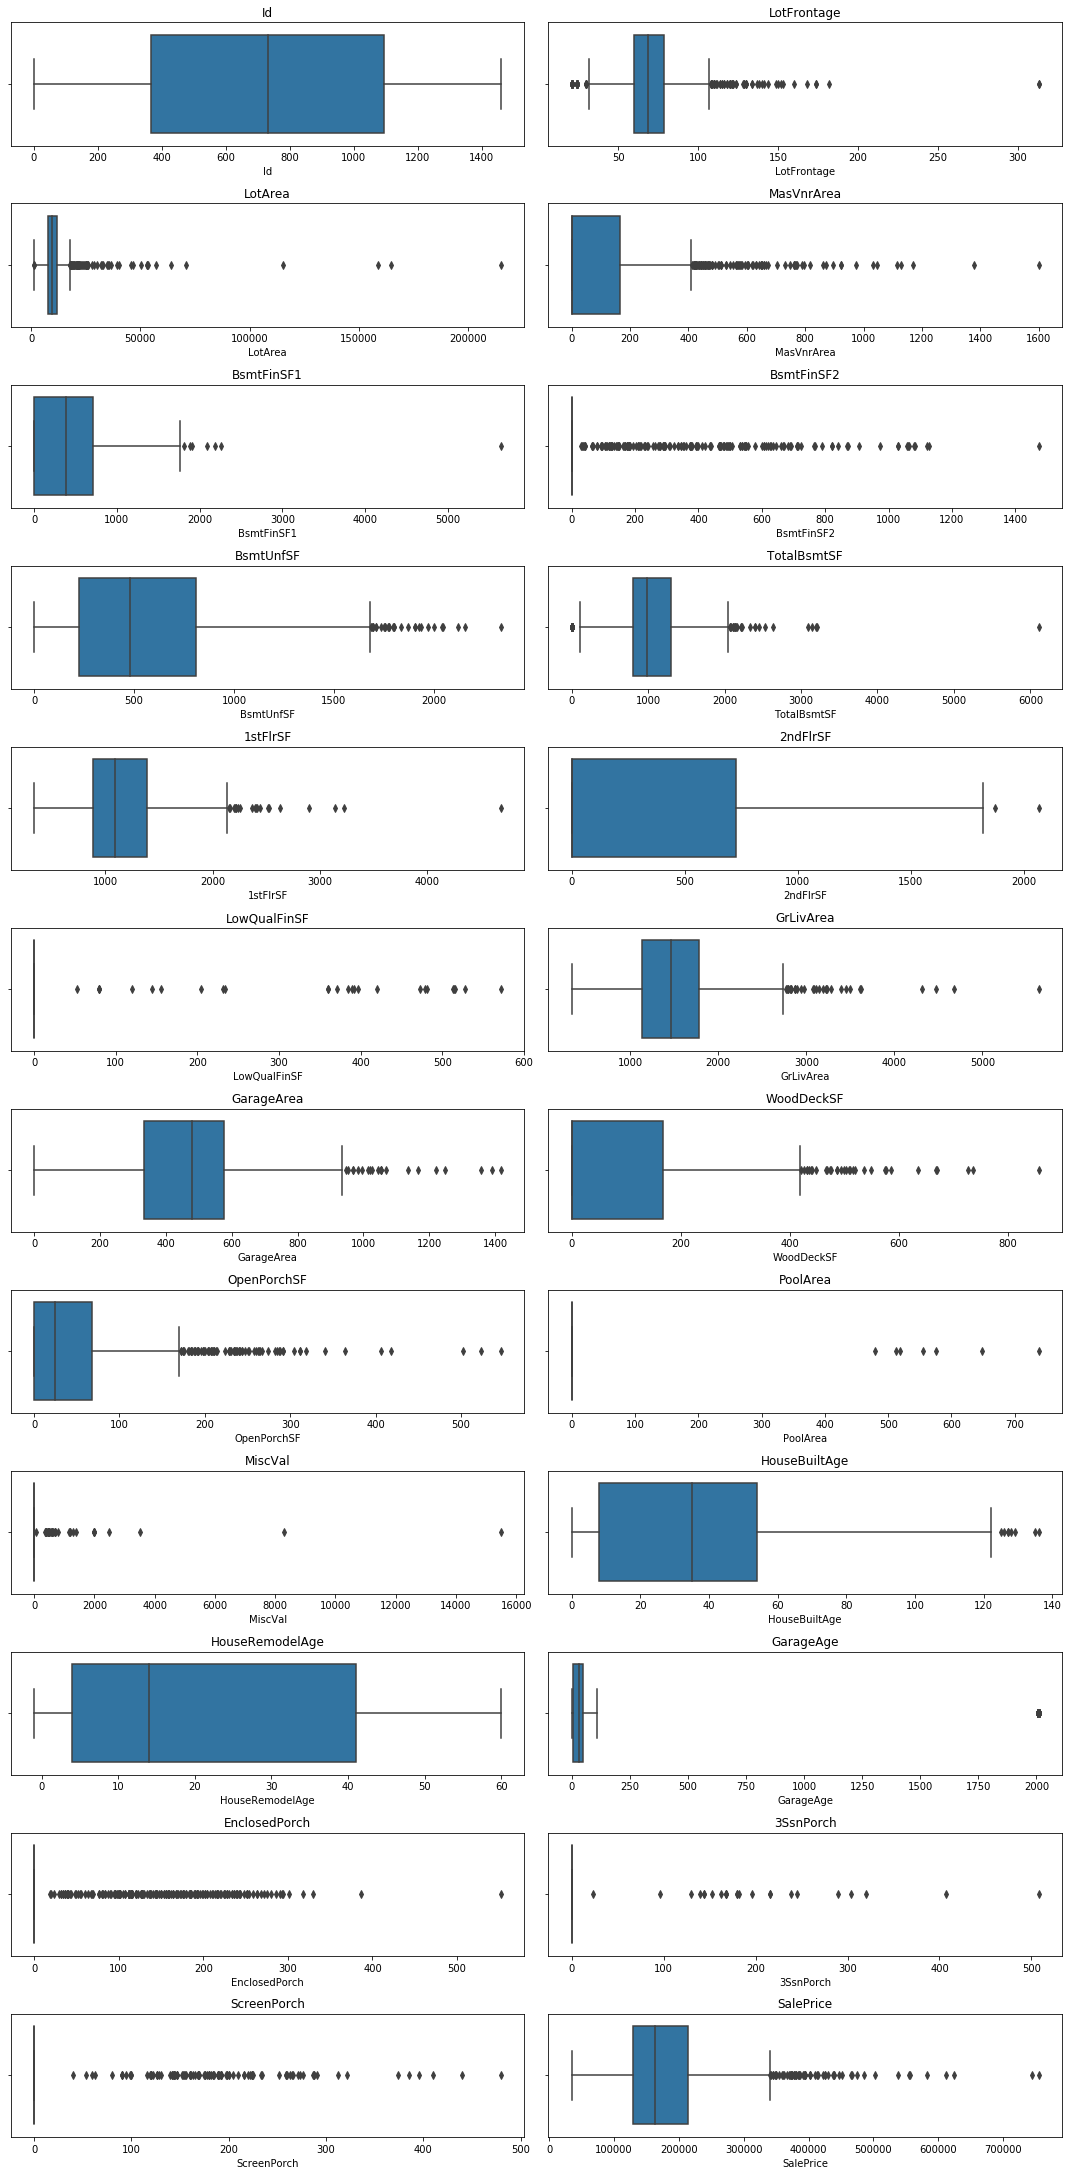

In [18]:
## Visualize all the numeric feature to check the spread in columns
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in numColumns:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.boxplot(numData[i])
    c = c + 1

plt.tight_layout()
plt.show();

### Correlation - HeatMap

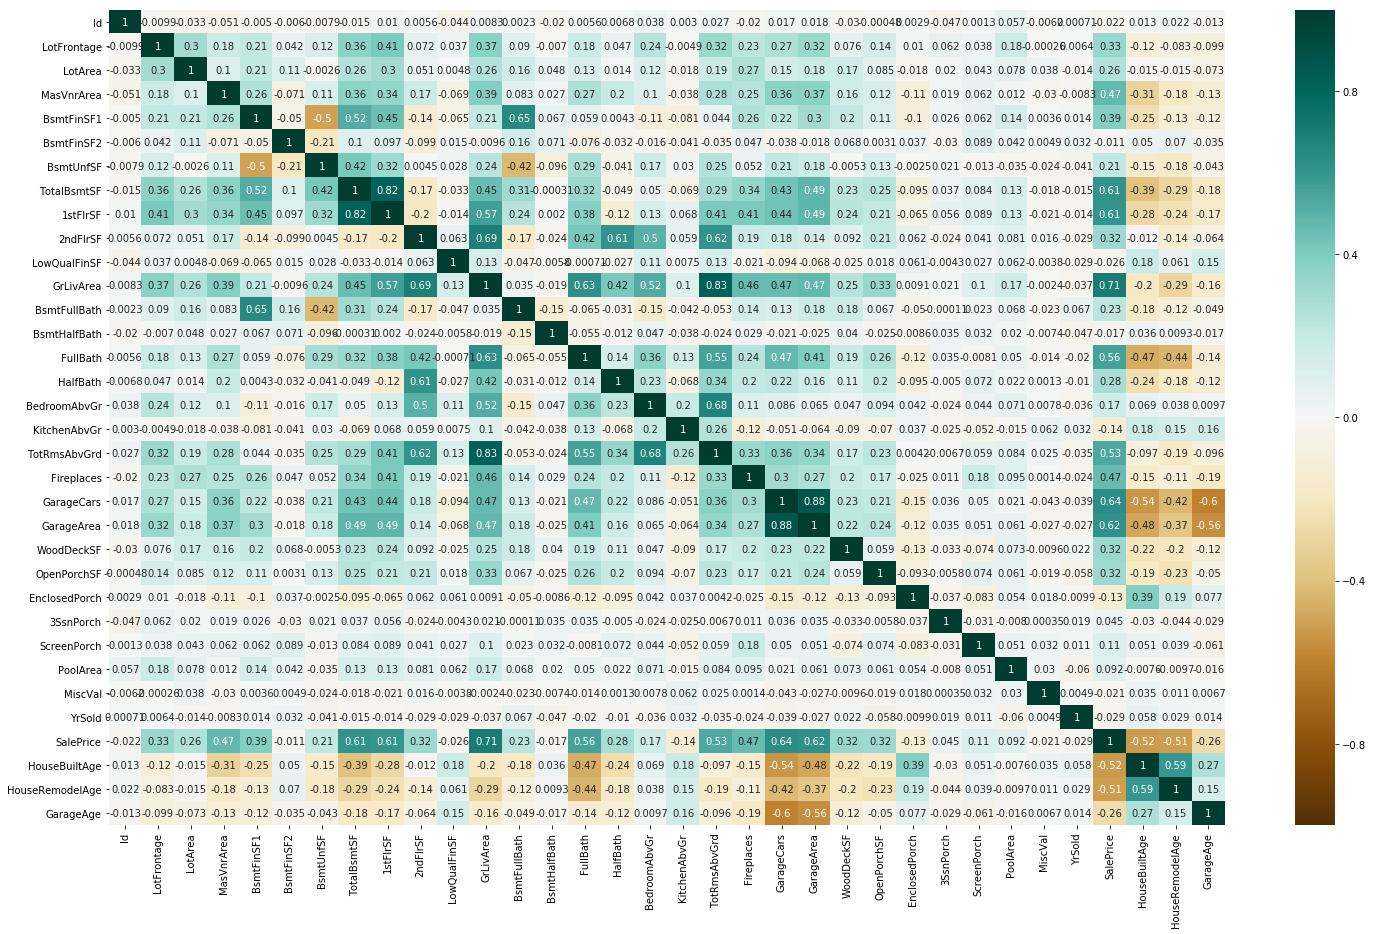

In [19]:
## Create heatmap to check correlation in data 
plt.figure(figsize=(25, 15))

sns.heatmap(houseDF.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

In [20]:
##Columns having categorical data in numerical format, so, changing to string for further operation
catCols1 = ["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
               "TotRmsAbvGrd","Fireplaces","GarageCars", "YrSold"]

for i in catCols1:
    houseDF[i] = houseDF[i].apply(lambda x: str(x))


### Skewness in Features

In [21]:
## Check skewness in features
skew_in_vars = numData.apply(lambda x: round(skew(x), 2))
skew_in_vars.sort_values(ascending=False)

MiscVal            24.45
PoolArea           14.81
LotArea            12.20
3SsnPorch          10.29
LowQualFinSF        9.00
BsmtFinSF2          4.25
ScreenPorch         4.12
GarageAge           3.87
EnclosedPorch       3.09
MasVnrArea          2.67
LotFrontage         2.41
OpenPorchSF         2.36
SalePrice           1.88
BsmtFinSF1          1.68
WoodDeckSF          1.54
TotalBsmtSF         1.52
1stFlrSF            1.38
GrLivArea           1.37
BsmtUnfSF           0.92
2ndFlrSF            0.81
HouseBuiltAge       0.61
HouseRemodelAge     0.50
GarageArea          0.18
Id                  0.00
dtype: float64

#### Observation:
- Above metric shows the skewness in data and it needs to be handled.
- Applying log transform to handle the skewness.

Performing log transforms for data which has skew more that 0.5. i.e. high skewed data
We can ignore SalePrice for now, as it is Target variable. This will be handled separately.

In [22]:
# Dropping SalePrice - Target Variable from skew Series
skew_in_vars = skew_in_vars.drop('SalePrice')

### Visualizing Skewness in Features

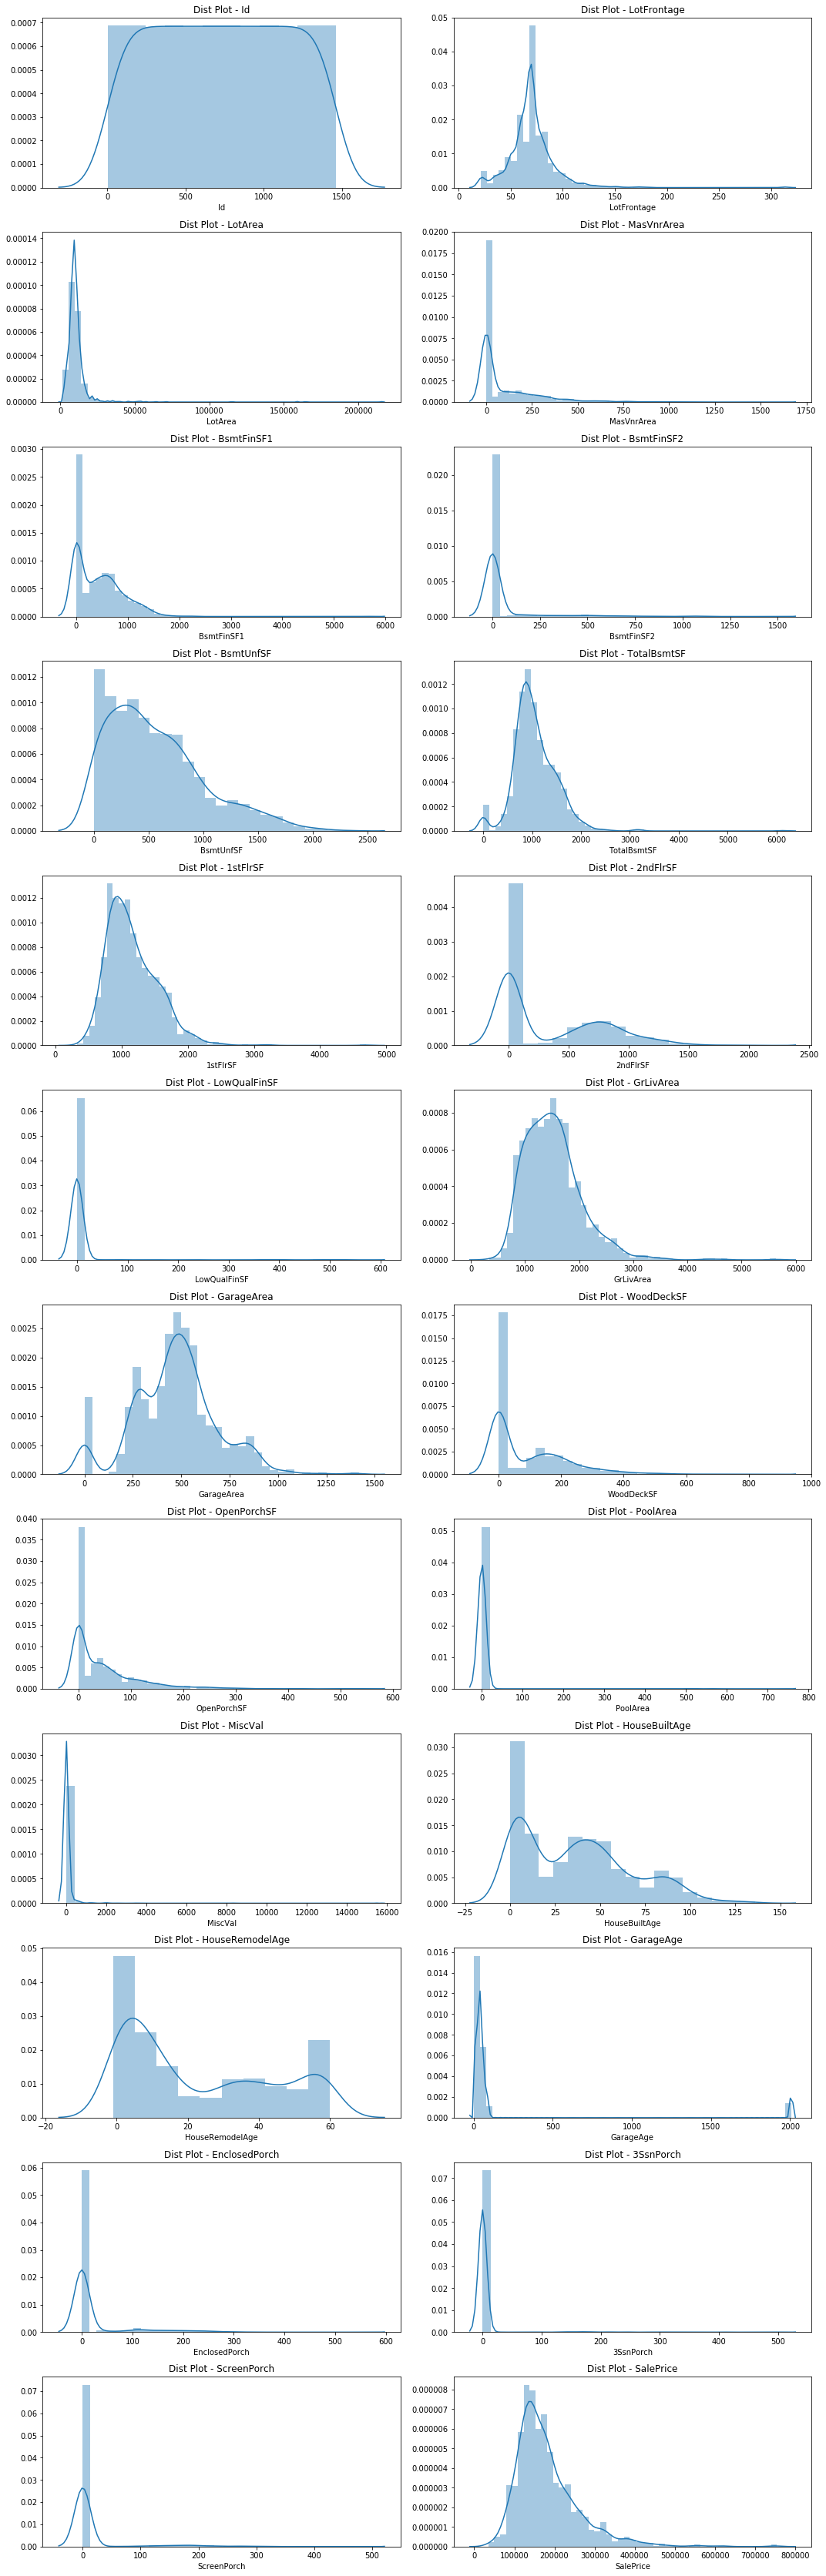

In [23]:
target_col = numColumns
a = (len(numColumns)/2) + 1
b = 2
c= 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)
for i in target_col:
    
    plt.subplot(a, b, c)
    plt.title('Dist Plot - {}'.format(i))
    plt.xlabel(i)
    sns.distplot(houseDF[i])
    c= c+1
    
plt.tight_layout()
plt.show();

### Transforming the X- Feature (Log tranformation)

In [24]:
##Print columns which skew more than 0.5
high_skew = skew_in_vars[skew_in_vars > 0.5]
skew_index = high_skew.index
skew_index

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal',
       'HouseBuiltAge', 'GarageAge', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch'],
      dtype='object')

In [25]:
##Applying log transformation where columns skew more than 0.5
for i in skew_index:
    numData[i] = np.log1p(numData[i])
    
numData.apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea           14.348342
3SsnPorch           7.727026
LowQualFinSF        7.452650
MiscVal             5.165390
ScreenPorch         3.147171
BsmtFinSF2          2.521100
EnclosedPorch       2.110104
SalePrice           1.880941
MasVnrArea          0.503014
HouseRemodelAge     0.501973
GarageAge           0.488354
2ndFlrSF            0.289346
GarageArea          0.179796
WoodDeckSF          0.153379
1stFlrSF            0.080032
Id                  0.000000
GrLivArea          -0.006134
OpenPorchSF        -0.023373
LotArea            -0.137263
BsmtFinSF1         -0.617774
HouseBuiltAge      -0.842604
LotFrontage        -0.869112
BsmtUnfSF          -2.184257
TotalBsmtSF        -5.149373
dtype: float64

### Target Variable  - SalePrice

In [26]:
# Checking Skewness in SalePrice
skew(numData['SalePrice'])

1.880940746034036

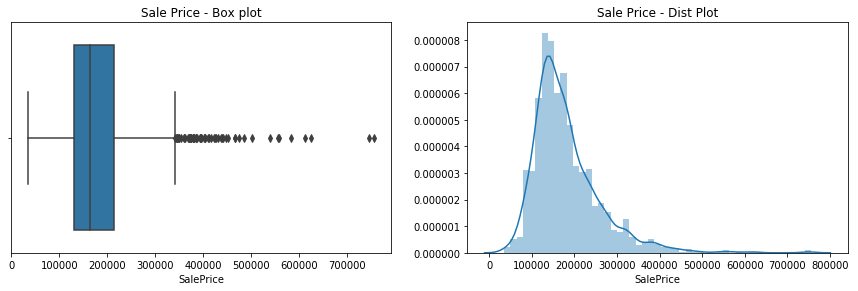

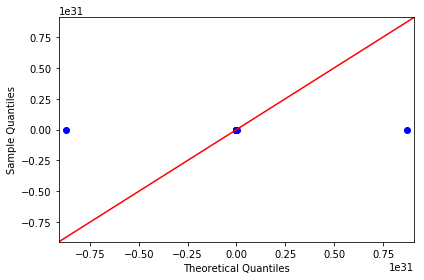

In [27]:
target_col = ['SalePrice']

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(10, 2, 1)
    plt.title('Sale Price - Box plot')
    plt.xlabel(i)
    sns.boxplot(houseDF[i])
    
    plt.subplot(10, 2, 2)
    plt.title('Sale Price - Dist Plot')
    plt.xlabel(i)
    sns.distplot(houseDF[i])
    
    sm.qqplot(houseDF[i], stats.t, distargs=(4,),fit=True, line="45")
    
plt.tight_layout()
plt.show();

#### Observation from above plots
- Box plot shows outlier in data.
- Distribution plot shows skewness in data.

We need to transform data handle outlier and skewness, applying log transformation for the same.
### Log Transformation of SalePrice

In [28]:
houseDF['SalePrice_log'] = np.log(houseDF['SalePrice'])

salePrice = houseDF[['SalePrice']].copy()
houseDF = houseDF.drop('SalePrice',axis=1) # removing the orignal variable

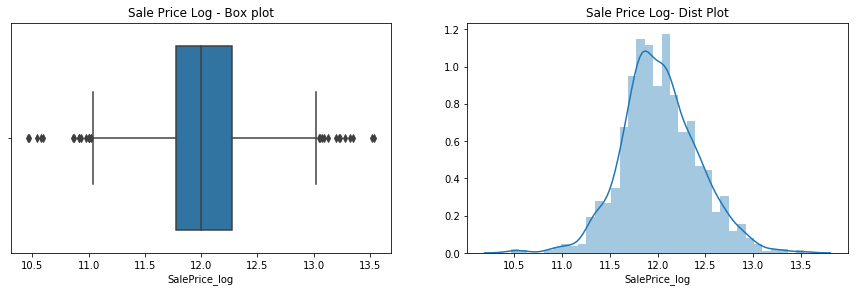

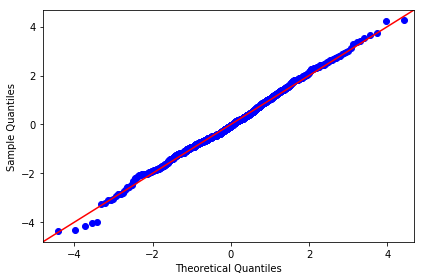

In [29]:
## Visualize the 'SalePrice' column after log transform
target_col = ['SalePrice_log']

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(10, 2, 1)
    plt.title('Sale Price Log - Box plot')
    plt.xlabel(i)
    sns.boxplot(houseDF[i])
    
    plt.subplot(10, 2, 2)
    plt.title('Sale Price Log- Dist Plot')
    plt.xlabel(i)
    sns.distplot(houseDF[i])
    
    sm.qqplot(houseDF[i], stats.t, distargs=(4,),fit=True, line="45")
    
plt.tight_layout()
plt.show();

In [30]:
# Adding Target variable (LOG) to numerical DataFrame
numData = pd.concat([numData, houseDF[['SalePrice_log']]],axis=1)
numData.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,HouseBuiltAge,HouseRemodelAge,GarageAge,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,SalePrice_log
0,1,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,548,0.000000,4.127134,0.0,0.0,1.791759,5,1.791759,0.000000,0.0,0.0,208500,12.247694
1,2,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,460,5.700444,0.000000,0.0,0.0,3.465736,31,3.465736,0.000000,0.0,0.0,181500,12.109011
2,3,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,608,0.000000,3.761200,0.0,0.0,2.079442,6,2.079442,0.000000,0.0,0.0,223500,12.317167
3,4,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,642,0.000000,3.583519,0.0,0.0,4.521789,36,2.197225,5.609472,0.0,0.0,140000,11.849398
4,5,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,836,5.262690,4.442651,0.0,0.0,2.197225,8,2.197225,0.000000,0.0,0.0,250000,12.429216


In [31]:
# Dropping 'SalePrice' variable from numerical DataFrame and numerical Columns List as we have new column with transformed value
numData = numData.drop('SalePrice', axis = 1)
numColumns.remove('SalePrice')

numData.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,HouseBuiltAge,HouseRemodelAge,GarageAge,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice_log
0,1,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,548,0.000000,4.127134,0.0,0.0,1.791759,5,1.791759,0.000000,0.0,0.0,12.247694
1,2,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,460,5.700444,0.000000,0.0,0.0,3.465736,31,3.465736,0.000000,0.0,0.0,12.109011
2,3,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,608,0.000000,3.761200,0.0,0.0,2.079442,6,2.079442,0.000000,0.0,0.0,12.317167
3,4,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,642,0.000000,3.583519,0.0,0.0,4.521789,36,2.197225,5.609472,0.0,0.0,11.849398
4,5,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,836,5.262690,4.442651,0.0,0.0,2.197225,8,2.197225,0.000000,0.0,0.0,12.429216


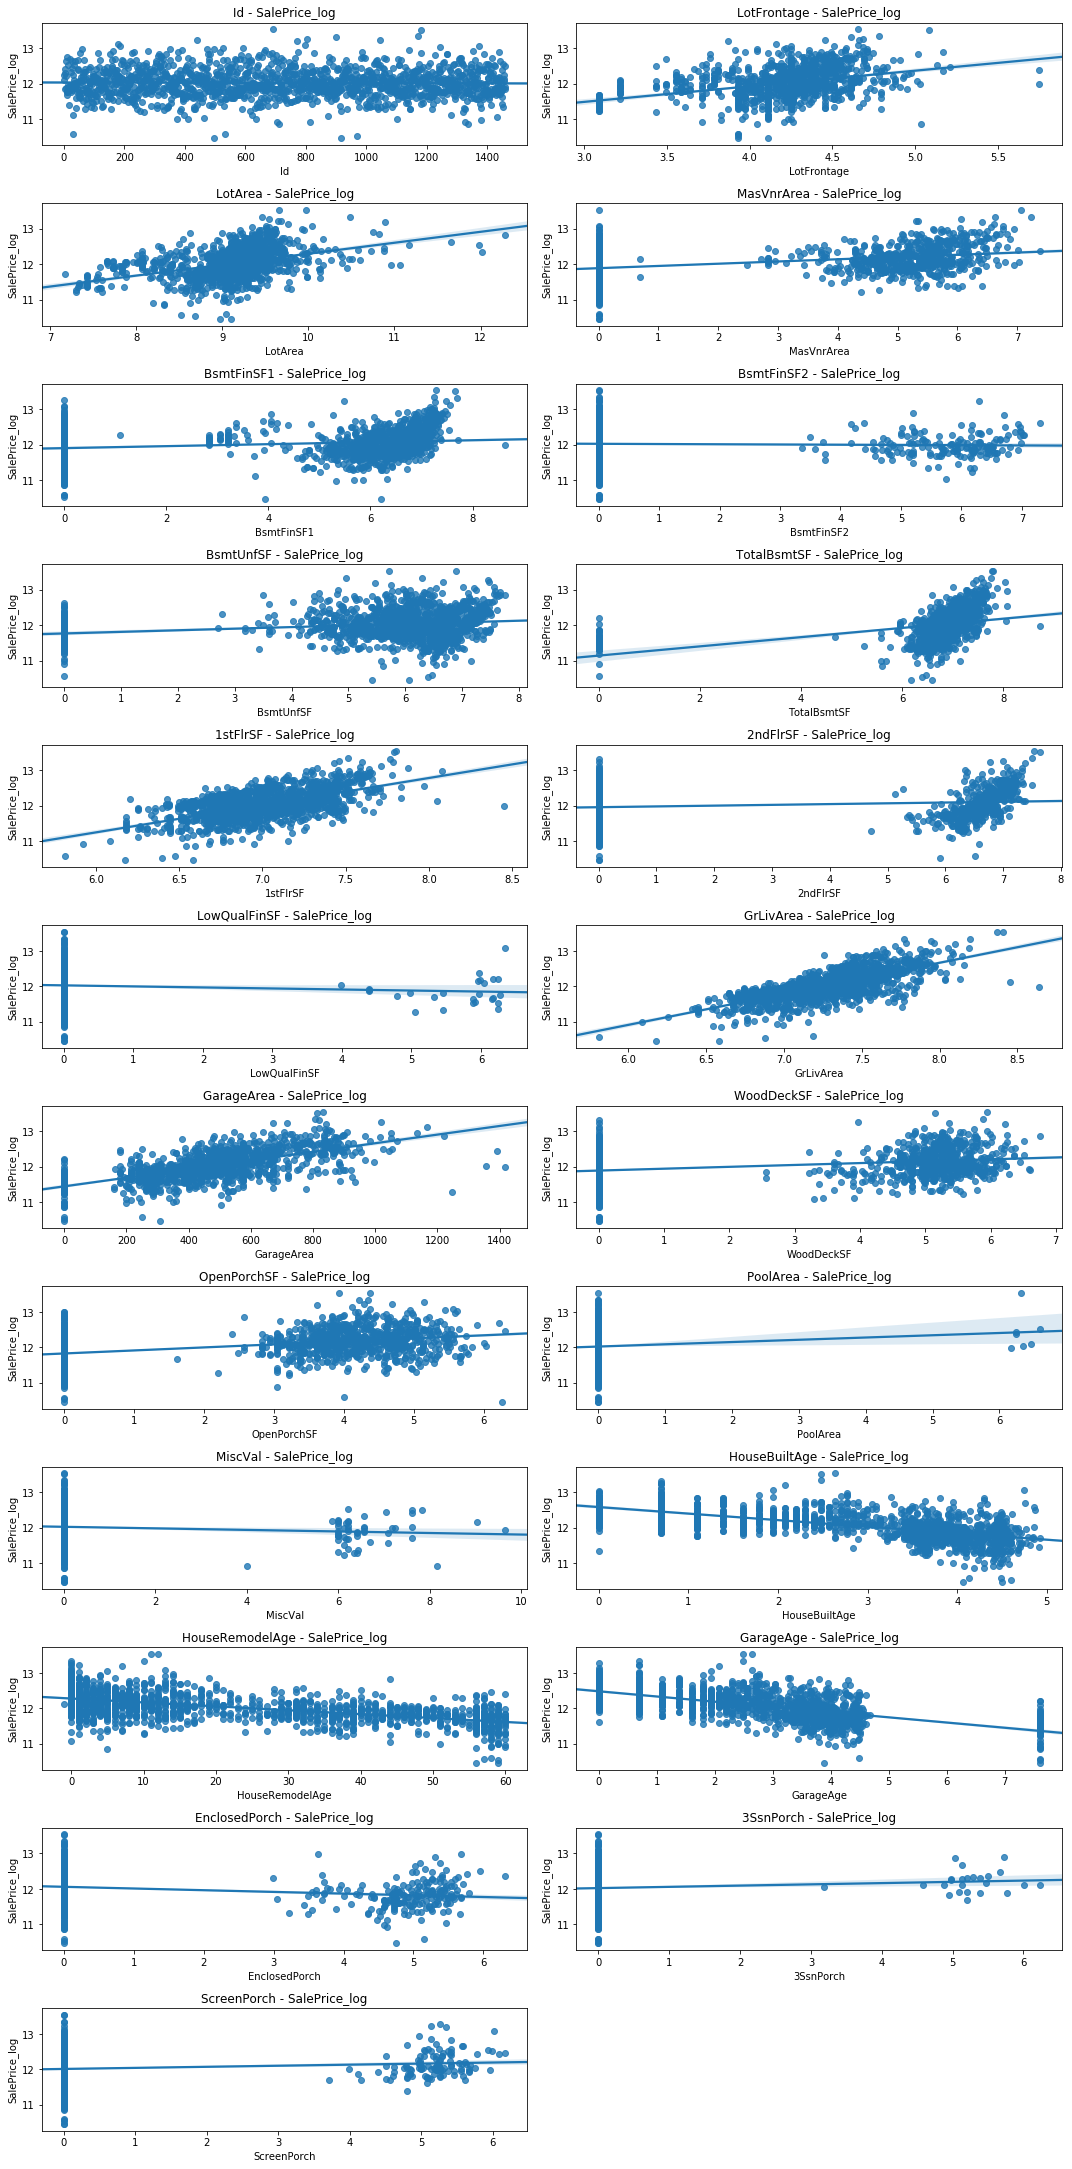

In [32]:
## Creating scatter plot to check column relation with target variable
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in numColumns:
    plt.subplot(a, b, c)
    plt.title('{} - SalePrice_log'.format(i))
    plt.xlabel(i)
    sns.regplot(numData[i], numData['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Correlation - Heatmap (Post Log transformation on Numerical Data)

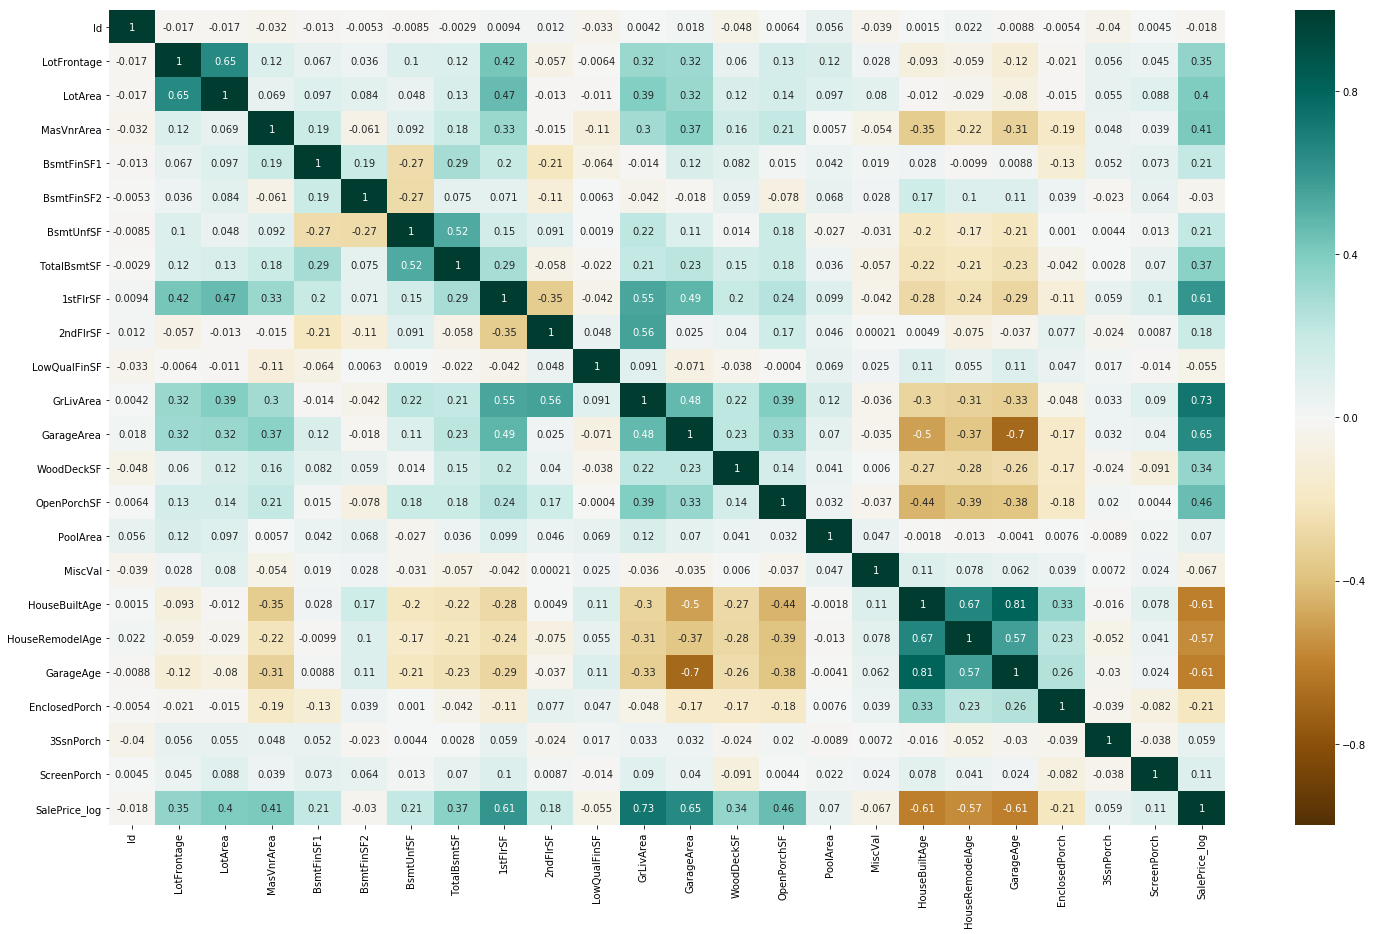

In [33]:
plt.figure(figsize=(25, 15))

sns.heatmap(numData.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

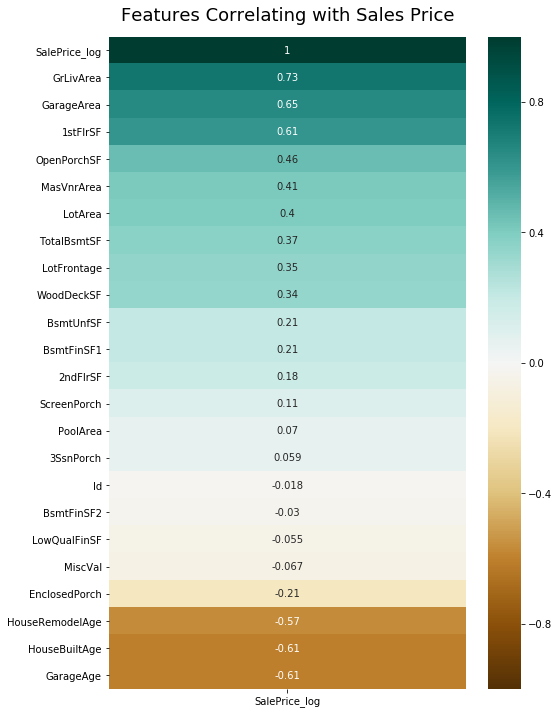

In [34]:
##Creating correlation matrix in single column to get more clear view
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(numData.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

### Neglecting the columns that are not strongly correlated to the target variable, numerical features that are less than a threshold corr value of 0.2

In [35]:
##Creating a temporary dataframe for the columns where correlation value is greater than 0.2
numDataCorr = numData.corr()
topNumDataCorr = numDataCorr.index[abs(numDataCorr['SalePrice_log']) > 0.2]
topNumDataCorr

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'HouseBuiltAge', 'HouseRemodelAge', 'GarageAge',
       'EnclosedPorch', 'SalePrice_log'],
      dtype='object')

In [36]:
## Checking shape of numeric dataframe
numDF_New = numData[topNumDataCorr]
numDF_New.shape

(1460, 16)

In [37]:
## Check 1st 5 rows of the dataframe
numDF_New.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,HouseBuiltAge,HouseRemodelAge,GarageAge,EnclosedPorch,SalePrice_log
0,4.189655,9.042040,5.283204,6.561031,5.017280,6.753438,6.753438,7.444833,548,0.000000,4.127134,1.791759,5,1.791759,0.000000,12.247694
1,4.394449,9.169623,0.000000,6.886532,5.652489,7.141245,7.141245,7.141245,460,5.700444,0.000000,3.465736,31,3.465736,0.000000,12.109011
2,4.234107,9.328212,5.093750,6.188264,6.075346,6.825460,6.825460,7.488294,608,0.000000,3.761200,2.079442,6,2.079442,0.000000,12.317167
3,4.110874,9.164401,0.000000,5.379897,6.293419,6.629363,6.869014,7.448916,642,0.000000,3.583519,4.521789,36,2.197225,5.609472,11.849398
4,4.442651,9.565284,5.860786,6.486161,6.196444,7.044033,7.044033,7.695758,836,5.262690,4.442651,2.197225,8,2.197225,0.000000,12.429216


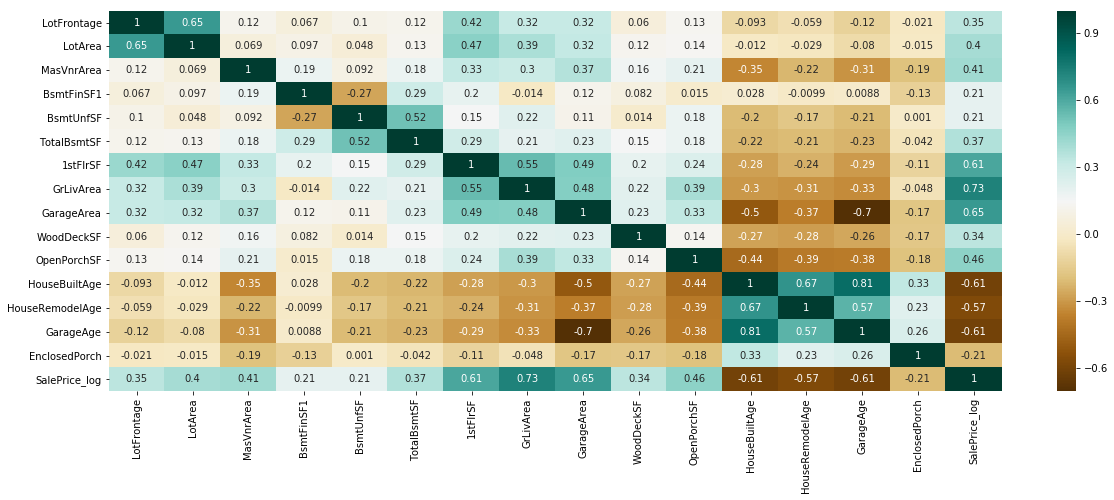

In [38]:
##Create heatmap for numeric data
plt.figure(figsize=(20,7))
sns.heatmap(numDF_New.corr(),annot=True,cmap="BrBG")

In [39]:
##Check 1st five rows of the dataframe
numDF_New.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,HouseBuiltAge,HouseRemodelAge,GarageAge,EnclosedPorch,SalePrice_log
0,4.189655,9.042040,5.283204,6.561031,5.017280,6.753438,6.753438,7.444833,548,0.000000,4.127134,1.791759,5,1.791759,0.000000,12.247694
1,4.394449,9.169623,0.000000,6.886532,5.652489,7.141245,7.141245,7.141245,460,5.700444,0.000000,3.465736,31,3.465736,0.000000,12.109011
2,4.234107,9.328212,5.093750,6.188264,6.075346,6.825460,6.825460,7.488294,608,0.000000,3.761200,2.079442,6,2.079442,0.000000,12.317167
3,4.110874,9.164401,0.000000,5.379897,6.293419,6.629363,6.869014,7.448916,642,0.000000,3.583519,4.521789,36,2.197225,5.609472,11.849398
4,4.442651,9.565284,5.860786,6.486161,6.196444,7.044033,7.044033,7.695758,836,5.262690,4.442651,2.197225,8,2.197225,0.000000,12.429216


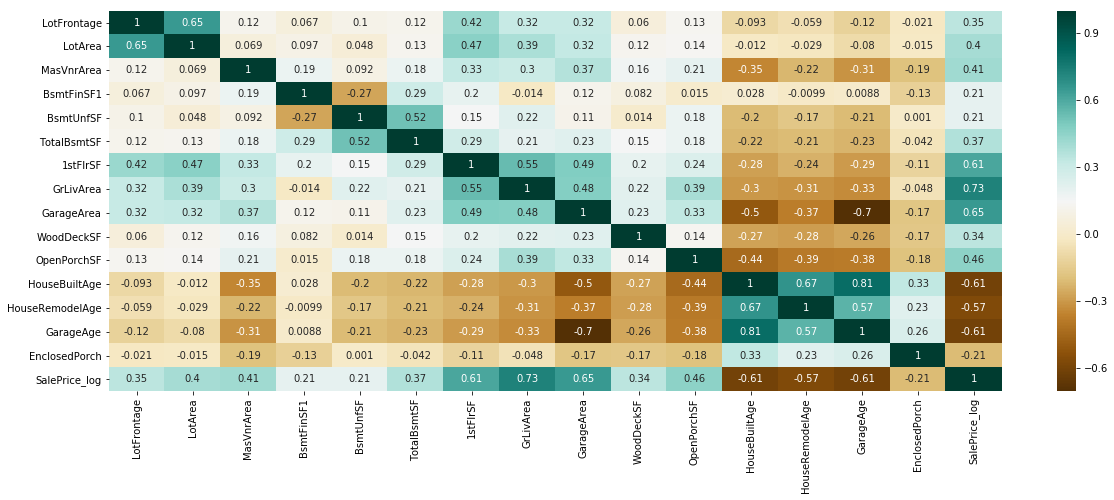

In [40]:
## Checking the heatmap to see correlation
plt.figure(figsize=(20,7))
sns.heatmap(numDF_New.corr(),annot=True,cmap="BrBG")

### Categorical Data Preparation

In [41]:
## Creating temporary dataframe to prepare categorical data
catCols_New = houseDF.select_dtypes(include=object).columns.tolist()
catCols_New

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [42]:
## Creating temporary dataframe to prepare categorical data
catData_New = houseDF[catCols_New]
catData_New.shape

(1460, 57)

In [43]:
## Checking all the feature infor of the dataframe
catData_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       14

In [44]:
##Print 1st 5 rows of the dataframe
catData_New.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No_FP,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,Feb,2008,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,May,2007,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,Sep,2008,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No_Pool,No_Fence,No_Feature,Feb,2006,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No_Pool,No_Fence,No_Feature,Dec,2008,WD,Normal


In [45]:
# Adding Target variable to categorical DataFrame
catData_New = pd.concat([catData_New,numDF_New[['SalePrice_log']]],axis=1)
catData_New.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice_log
0,2-STORY 1946 & NEWER,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No_FP,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,Feb,2008,WD,Normal,12.247694
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,May,2007,WD,Normal,12.109011
2,2-STORY 1946 & NEWER,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,Sep,2008,WD,Normal,12.317167
3,2-STORY 1945 & OLDER,RL,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No_Pool,No_Fence,No_Feature,Feb,2006,WD,Abnorml,11.849398
4,2-STORY 1946 & NEWER,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No_Pool,No_Fence,No_Feature,Dec,2008,WD,Normal,12.429216


In [46]:
##Checking shape of the dataframe after concatenation
catData_New.shape

(1460, 58)

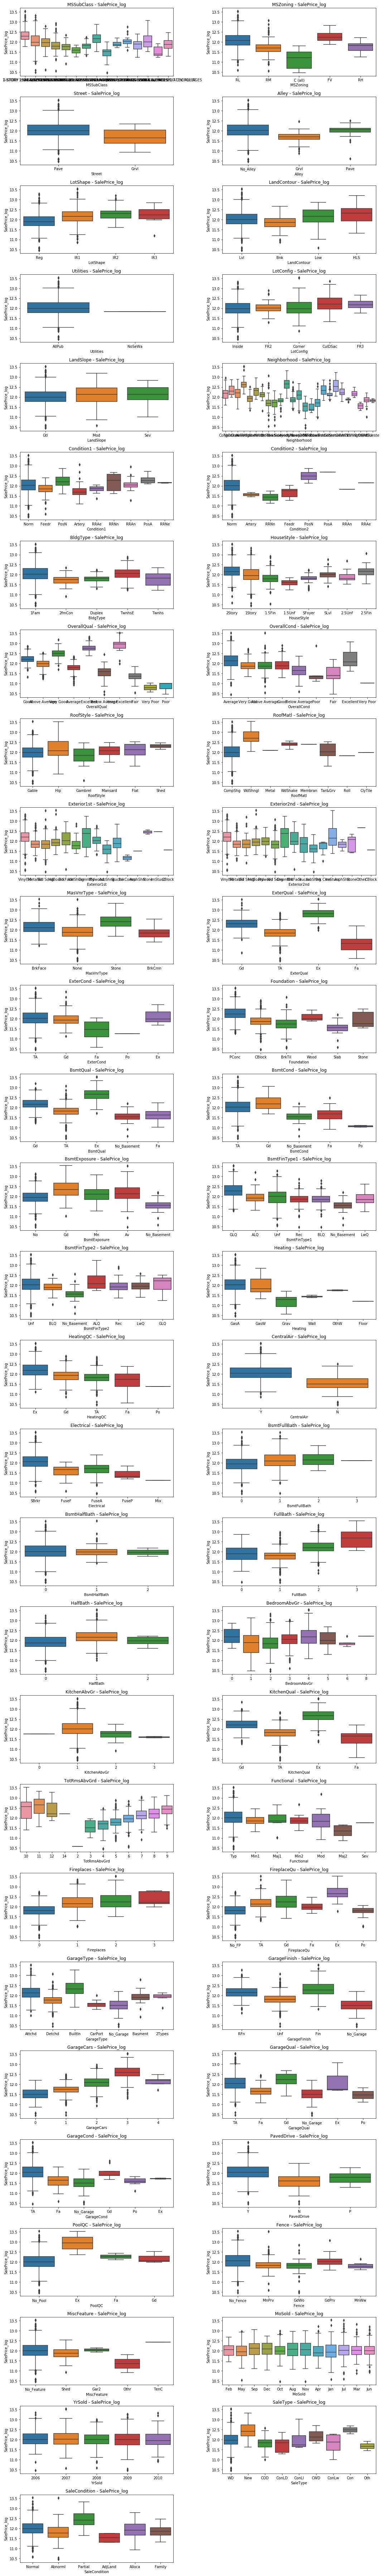

In [47]:
##Create box plot of features with respect to target variable
a = 29
b = 2
c = 1


fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in catCols_New:
    plt.subplot(a, b, c)
    plt.title('{} - SalePrice_log'.format(i))
    plt.xlabel(i)
    sns.boxplot(catData_New[i], catData_New['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### One hot Encoding - Encoding Categorical Features

In [48]:
#Add dummy features for categorical variable and dropping one to reduce redundancy and checking shape of the dataframe
catData_New = pd.get_dummies(catData_New, drop_first = True)
catData_New.shape

(1460, 308)

In [49]:
##Check 1st 5 rows of the dataframe after dummy inclusion
catData_New.head()

,SalePrice_log,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenA

### Merge categorical and numerical dataframe to get Final dataframe

In [50]:
## Drop 'SalePrice_log' to remove duplicate
catData_New = catData_New.drop('SalePrice_log', axis = 1)
catData_New.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Kitchen

In [51]:
## Merge categorical and numerical dataframe with main to get Final dataframe
houseDF =  pd.concat([houseDF[['Id']],catData_New,numDF_New],axis=1)
houseDF.shape

(1460, 324)

In [52]:
## Dropping 'Id' as it is just for indexing purpose and won't impact any outcome
houseDF = houseDF.drop('Id', axis = 1)
houseDF.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Kitchen

## Train-Test Split

In [53]:
##Spliting the dataframe in train and test set in (70,30)
train, test = train_test_split(houseDF, train_size = 0.7, test_size = 0.3, random_state = 25)

In [54]:
##Reoving target variable from both train and test set
y_train = train['SalePrice_log']
X_train = train.drop("SalePrice_log", axis = 1)

y_test= test['SalePrice_log']
X_test = test.drop('SalePrice_log', axis = 1)

In [55]:
##Print shape for all the train and test dataframe
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (1021, 322)
X test shape (438, 322)
y train shape (1021,)
y test shape (438,)


In [56]:
##Print 1st 5 rows of 'y_train'
print(y_train.head())

122     11.820410
492     12.059803
1205    12.513190
116     11.842229
1017    12.141534
Name: SalePrice_log, dtype: float64


In [57]:
##Print 1st 5 rows of 'y_test'
print(y_test.head())

932     12.676076
409     12.735965
1271    12.132157
270     12.491252
1290    12.103486
Name: SalePrice_log, dtype: float64


### Linear Regression - Model Building

In [58]:
## Building a Linear Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [59]:
## Running RFE with the output number of the variable equal to 60
rfe = RFE(reg, 60)
rfe = rfe.fit(X_train, y_train)

In [60]:
#Print Columns selected by RFE.
rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_2fmCon', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'OverallQual_Excellent', 'OverallQual_Very Excellent',
       'OverallQual_Very Poor', 'OverallCond_Very Poor', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMat

In [61]:
### Creating X_train dataframe with RFE selected variables
X_train_new=X_train[rfe_col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     111.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:58:54   Log-Likelihood:                 423.88
No. Observations:                1021   AIC:                            -757.8
Df Residuals:                     976   BIC:                            -536.0
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                3.5590      0.216     16.485      0.000       3.135       3.983
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                           0.1928      0.017     11.129      0.000       0.159       0.227
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER     0.3376      0.027     12.677      0.000       0.285       0.390
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES                         0.1195      0.116      1.027      0.305      -0.109       0.348
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES                 0.0053      0.019      0.282      0.778      -0.032       0.042
MSSubClass_2-STORY 1945 & OLDER                                      0.0534      0.030      1.789      0.074      -0.005       0.112
MSSubClass_2-STORY 1946 & NEWER                                      0.1448      0.020      7.286      0.000       0.106       0.184
MSSubClass_DUPLEX - ALL STYLES AND AGES                             -0.0246      0.017     -1.473      0.141      -0.057       0.008
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   0.2457      0.055      4.450      0.000       0.137       0.354
MSSubClass_SPLIT FOYER                                               0.2204      0.044      4.954      0.000       0.133       0.308
MSSubClass_SPLIT OR MULTI-LEVEL                                      0.1414      0.031      4.494      0.000       0.080       0.203
MSZoning_FV                                                          0.6930      0.078      8.876      0.000       0.540       0.846
MSZoning_RH                                                          0.4075      0.094      4.326      0.000       0.223       0.592
MSZoning_RL                                                          0.5653      0.074      7.591      0.000       0.419       0.711
MSZoning_RM                                                          0.4223      0.075      5.639      0.000       0.275       0.569
Condition2_Feedr                                                     0.3790      0.124      3.059      0.002       0.136       0.622
Condition2_Norm                                                      0.4461      0.090      4.959      0.000       0.270       0.623
Condition2_PosA                                                      0.6935      0.188      3.690      0.000       0.325       1.062
Condition2_RRAe                                                      0.1669      0.095      1.764      0.078      -0.019       0.352
Condition2_RRAn                                                      0.3300      0.189      1.748      0.081      -0.040       0.700
Condition2_RRNn         

### Ridge Regression - Model Building

In [62]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 6.0}
-0.08497325546127024


In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030899,0.002627,0.010758,0.004261,0.0001,{'alpha': 0.0001},-0.108751,-0.095988,-0.108165,-0.097553,-0.096709,-0.101433,0.005760,25,-0.054011,-0.056508,-0.053927,-0.053446,-0.058371,-0.055252,0.001890
1,0.031713,0.001202,0.008137,0.000739,0.001,{'alpha': 0.001},-0.107480,-0.095886,-0.107858,-0.097424,-0.096285,-0.100987,0.005481,24,-0.054048,-0.056510,-0.053967,-0.053482,-0.058409,-0.055283,0.001885
2,0.029909,0.001877,0.008391,0.001039,0.01,{'alpha': 0.01},-0.102734,-0.095036,-0.105682,-0.096508,-0.093300,-0.098652,0.004741,23,-0.054333,-0.056552,-0.054391,-0.053848,-0.058674,-0.055560,0.001816
3,0.031077,0.003018,0.009445,0.001195,0.05,{'alpha': 0.05},-0.099602,-0.092807,-0.101947,-0.095223,-0.087504,-0.095417,0.005092,21,-0.055014,-0.056900,-0.055712,-0.055001,-0.059185,-0.056362,0.001572
4,0.030734,0.002326,0.009431,0.002279,0.1,{'alpha': 0.1},-0.098781,-0.090907,-0.100214,-0.093893,-0.084276,-0.093614,0.005742,20,-0.055638,-0.057277,-0.056472,-0.055660,-0.059660,-0.056941,0.001488
5,0.030511,0.003005,0.009947,0.002006,0.2,{'alpha': 0.2},-0.097507,-0.089155,-0.098374,-0.092219,-0.082806,-0.092012,0.005721,19,-0.056473,-0.057940,-0.057272,-0.056408,-0.060465,-0.057712,0.001488
6,0.029452,0.002082,0.008921,0.001582,0.3,{'alpha': 0.3},-0.096623,-0.087904,-0.097106,-0.091330,-0.082539,-0.091100,0.005480,18,-0.057130,-0.058510,-0.057756,-0.056969,-0.061093,-0.058292,0.001502
7,0.029292,0.001626,0.008192,0.000391,0.4,{'alpha': 0.4},-0.095955,-0.086816,-0.096095,-0.090728,-0.082305,-0.090380,0.005325,17,-0.057679,-0.058984,-0.058109,-0.057431,-0.061655,-0.058772,0.001536
8,0.027802,0.004225,0.009322,0.003982,0.5,{'alpha': 0.5},-0.095362,-0.085862,-0.095253,-0.090309,-0.082093,-0.089776,0.005212,16,-0.058173,-0.059362,-0.058436,-0.057835,-0.062111,-0.059183,0.001549
9,0.026943,0.003817,0.008283,0.004970,0.6,{'alpha': 0.6},-0.094915,-0.085096,-0.094517,-0.089944,-0.081838,-0.089262,0.005148,15,-0.058616,-0.059714,-0.058722,-0.058241,-0.062495,-0.059558,0.001547


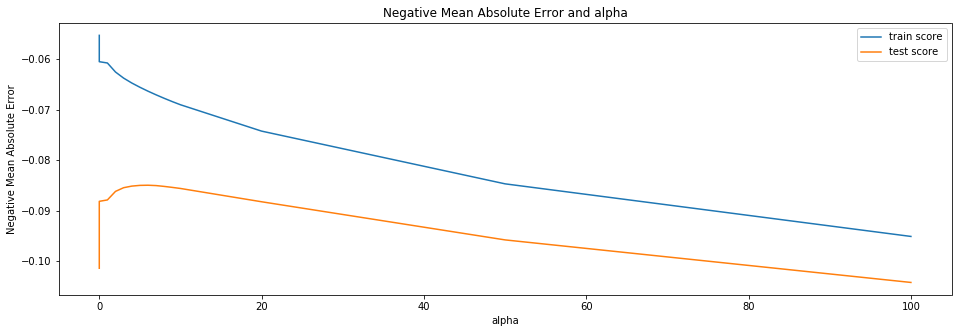

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [66]:
#final ridge model on best alpha
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.55978737e-02, -4.67634138e-02,  4.32262148e-02,  2.74389872e-02,
        8.75371173e-03, -4.16070670e-03,  3.35476040e-02,  1.36820254e-02,
       -7.32111248e-03, -4.80752372e-02,  1.05593099e-02, -1.79602198e-03,
        2.15202944e-02, -2.03716778e-03,  7.46856203e-02,  2.17529460e-02,
        6.69335775e-02,  3.11992958e-02,  6.12929486e-02,  3.38716496e-03,
        3.30428021e-02,  4.83901435e-02, -3.35852280e-02, -2.54774333e-04,
        6.08127161e-02,  1.47159828e-02,  4.61329880e-02,  0.00000000e+00,
        2.25984825e-02, -3.91575584e-02, -2.94597715e-02, -7.52244171e-03,
        1.96375297e-02, -2.28523795e-02, -1.72157914e-03, -7.17521800e-04,
        3.98855036e-02,  2.90628439e-02, -1.73999441e-02,  8.95802505e-02,
       -7.87329512e-02, -3.31392769e-02, -7.56494149e-02, -7.20336326e-02,
       -2.48442176e-02, -2.93463681e-02,  1.86966946e-02, -3.39605687e-02,
        5.15788856e-02,  6.97389285e-02, -4.80685437e-02, -2.65029521e-02,
       -1.91013071e-02, -

### Prediction

In [67]:
##Getting different performance evaluation metric

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric1 = []

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)
metric1.append(train1_r2)
test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)
metric1.append(test1_r2)

rss1_train = np.sum(np.square(y_train - y_train_pred))
print('RSS_Score_Train: ', rss1_train)
metric1.append(rss1_train)
rss1_test = np.sum(np.square(y_test - y_test_pred))
print('RSS_Score_Test: ', rss1_test)
metric1.append(rss1_test)

rmse1_train = mean_squared_error(y_train, y_train_pred)
print("MSE_Train : ", rmse1_train)
metric1.append(rmse1_train)
rmse1_test = mean_squared_error(y_test, y_test_pred)
print("MSE_Test : ", rmse1_test)
metric1.append(rmse1_test)

mae1_train = mean_absolute_error(y_train, y_train_pred)
print("MAE_Train : ",mae1_train)
metric1.append(mae1_train)
mae1_test = mean_absolute_error(y_test, y_test_pred)
print("MAE_Test : ",mae1_test)
metric1.append(mae1_test)

R2_Score_Train:  0.935836841907745
R2_Score_Test:  0.8894676540163483
RSS_Score_Train:  10.073799258337495
RSS_Score_Test:  8.369820888773976
MSE_Train :  0.009866600644796763
MSE_Test :  0.01910918011135611
MAE_Train :  0.06699909307866153
MAE_Test :  0.09477335645970077


### Lasso Regression - Model Building

In [68]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [70]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.0881996070920721


In [71]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [72]:
##Getting different performance evaluation metric

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric2 = []

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)
metric2.append(train1_r2)
test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)
metric2.append(test1_r2)

rss1_train = np.sum(np.square(y_train - y_train_pred))
print('RSS_Train: ', rss1_train)
metric2.append(rss1_train)
rss1_test = np.sum(np.square(y_test - y_test_pred))
print('RSS_Test: ', rss1_test)
metric2.append(rss1_test)

rmse1_train = mean_squared_error(y_train, y_train_pred)
print("MSE_Train : ", rmse1_train)
metric2.append(rmse1_train)
rmse1_test = mean_squared_error(y_test, y_test_pred)
print("MSE_Test : ", rmse1_test)
metric2.append(rmse1_test)

mae1_train = mean_absolute_error(y_train, y_train_pred)
print("MAE_Train : ",mae1_train)
metric2.append(mae1_train)
mae1_test = mean_absolute_error(y_test, y_test_pred)
print("MAE_Test : ",mae1_test)
metric2.append(mae1_test)

R2_Score_Train:  0.9118976497832272
R2_Score_Test:  0.8892506739204011
RSS_Train:  13.83232086231504
RSS_Test:  8.386251233424183
MSE_Train :  0.013547816711376141
MSE_Test :  0.019146692313753842
MAE_Train :  0.07769127270893182
MAE_Test :  0.09183119884726561


In [73]:
##Print coefficient values for Lasso
lasso.coef_

array([-6.55285302e-03, -4.86734711e-02,  3.13517902e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.76540991e-03,
       -0.00000000e+00, -1.58272425e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.74539144e-02,  0.00000000e+00,
        4.25066159e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.33568108e-02, -0.00000000e+00, -0.00000000e+00,
        8.03243660e-03,  0.00000000e+00,  1.52430626e-02,  0.00000000e+00,
        2.48105182e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        4.19561429e-02,  0.00000000e+00, -0.00000000e+00,  1.00561344e-01,
       -5.70111582e-02, -0.00000000e+00, -3.43413084e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.53403678e-02,  7.01187108e-02, -2.12211596e-02, -0.00000000e+00,
       -0.00000000e+00, -

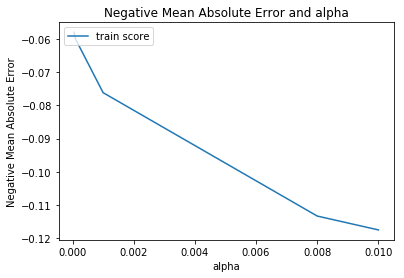

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'MAE (Train)','MAE (Test)'], 
        
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.935837,0.911898
1,R2 Score (Test),0.889468,0.889251
2,RSS (Train),10.073799,13.832321
3,RSS (Test),8.369821,8.386251
4,MSE (Train),0.009867,0.013548
5,MSE (Test),0.019109,0.019147
6,MAE (Train),0.066999,0.077691
7,MAE (Test),0.094773,0.091831


- Best parameter for Ridge is 6.0.
- Best parameter for Lasso is 0.001.

In [76]:
##Prepare metric to compare Ridge and Lasso score
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(15)

,Ridge,Lasso
GrLivArea,0.225738,0.335839
OverallQual_Excellent,0.132463,0.183282
Neighborhood_StoneBr,0.116562,0.113189
OverallQual_Very Good,0.098242,0.106575
Functional_Typ,0.085078,0.104576
Neighborhood_Crawfor,0.089580,0.100561
Exterior1st_BrkFace,0.060455,0.078068
1stFlrSF,0.091304,0.075587
CentralAir_Y,0.060952,0.075044
Neighborhood_NridgHt,0.069739,0.070119


In [77]:
##Prepare metric to compare Ridge score
betas4 = pd.DataFrame(index=X_train.columns)
betas4['Ridge'] = ridge.coef_

betas4.sort_values(by=['Ridge'], ascending=False).head(5)

,Ridge
GrLivArea,0.225738
OverallQual_Excellent,0.132463
Neighborhood_StoneBr,0.116562
OverallQual_Very Good,0.098242
FullBath_3,0.094725


## Question 1: Double the values of Alpha for Ridge and Lasso
- Best parameter for Ridge is 6.0.
- Best parameter for Lasso is 0.001.
### After doubling the values
- Best parameter for Ridge is 12.0.
- Best parameter for Lasso is 0.002.

In [78]:
##Ridge
#earlier for Ridge alpha = 6 now take 12
alpha = 12
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print('ridge.coef: ', ridge.coef_)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)

ridge.coef:  [-1.71435156e-02 -5.41253966e-02  3.72110913e-02  2.38315493e-02
  4.98530633e-03 -5.89403526e-03  3.27154855e-02  2.16912391e-02
 -7.91832227e-03 -3.70224556e-02  9.08242908e-03 -5.32232703e-03
  1.34890639e-02 -3.22273920e-03  5.02451396e-02  7.28368239e-03
  5.02387214e-02  6.61750116e-03  4.44912075e-02  4.20789042e-04
  2.60291492e-02  4.37987120e-02 -2.90139528e-02 -1.55816287e-03
  5.04846576e-02  8.09208376e-03  3.90132096e-02  0.00000000e+00
  2.44504318e-02 -3.16415174e-02 -1.44941993e-02 -5.28303206e-03
  1.68586752e-02 -1.72441674e-02  5.85849651e-04  1.75826404e-03
  4.00425019e-02  2.41408172e-02 -1.84311954e-02  7.98775130e-02
 -7.18082597e-02 -3.34896404e-02 -5.97353974e-02 -5.23612118e-02
 -2.22541813e-02 -2.40463126e-02  9.27468762e-03 -2.58585875e-02
  4.16800021e-02  6.00002715e-02 -3.60550892e-02 -1.93149002e-02
 -1.58275537e-02 -8.45524957e-03  2.56010699e-02  9.41682670e-02
 -9.01442237e-03  2.31643859e-02 -1.48083957e-02  3.94351007e-02
  1.17048055

In [79]:
##Prepare metric for Ridge coefficient
betas1 = pd.DataFrame(index=X_train.columns)
betas1['Ridge'] = ridge.coef_
betas1.sort_values(by=['Ridge'], ascending=False).head(5)

,Ridge
GrLivArea,0.191188
OverallQual_Excellent,0.112608
1stFlrSF,0.100661
Neighborhood_StoneBr,0.094168
OverallQual_Very Good,0.088716


### R2 score of train data is drop from `0.935837` to `0.92891` and `0.889468` to `0.88756` for test.

In [80]:
##Lasso
#earlier for Lass alpha = 0.0001 now take 0.0002.
alpha = 0.002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
print('lasso.coef: ', lasso.coef_)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)

lasso.coef:  [-0.00000000e+00 -3.59930523e-02  2.18278094e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  7.23732374e-03 -0.00000000e+00
  4.00743875e-02 -5.12534573e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.06131433e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.80824534e-02  0.00000000e+00 -0.00000000e+00  8.16310315e-02
 -5.04438688e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  3.57095830e-02 -6.75900636e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  6.79998122e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.73703430e-02
  0.00000000

In [81]:
##Prepare metric for Lasso coefficient
betas2 = pd.DataFrame(index=X_train.columns)
betas2['Lasso'] = lasso.coef_
betas2.sort_values(by=['Lasso'], ascending=False).head(5)

,Lasso
GrLivArea,0.351886
OverallQual_Excellent,0.154858
Functional_Typ,0.099769
OverallQual_Very Good,0.092724
Neighborhood_Crawfor,0.081631


### R2 score of train data is drop from `0.911898` to `0.892761` for train and `0.889251` to `0.87619` for test.

## Question 3: Drop the Top 5 features and rebuild lasso
#### Top 5 features are `GrLivArea`, `OverallQual_Excellent`, `Neighborhood_StoneBr`, `OverallQual_Very Good`, `Functional_Typ`

In [82]:
X_train =  X_train.drop(['GrLivArea', 'OverallQual_Excellent', 'Neighborhood_StoneBr', 'OverallQual_Very Good', 'Functional_Typ'], axis=1)

X_test =  X_test.drop(['GrLivArea', 'OverallQual_Excellent', 'Neighborhood_StoneBr', 'OverallQual_Very Good', 'Functional_Typ'], axis=1)

In [83]:
# Rebuild lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.09595716377574673


In [85]:
#final lasso model
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

##Getting R2 score after dropping top 5 columns

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_Score_Train: ', train1_r2)

test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_Score_Test: ', test1_r2)


R2_Score_Train:  0.9387645002116002
R2_Score_Test:  0.8781413232972781


#### After rebuilding R2 score changed from `0.911898` to `0.938764` for train and `0.889251` to `0.878141` for test.

In [86]:
##Prepare metric for Lasso coefficient
betas3 = pd.DataFrame(index=X_train.columns)
betas3['Lasso'] = lasso.coef_
betas3.sort_values(by=['Lasso'], ascending=False).head(5)

,Lasso
MSZoning_FV,0.348195
MSZoning_RL,0.331484
RoofMatl_WdShngl,0.314789
MSZoning_RH,0.284784
MSZoning_RM,0.284259


#### Top 5 features are 
- `MSZoning_FV`
- `MSZoning_RL`
- `RoofMatl_WdShngl`
- `MSZoning_RH`
- `MSZoning_RM`